<a href="https://colab.research.google.com/github/Bekamgenene/Elevvo-Internship-Program/blob/main/Loan_Approval_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q imbalanced-learn

**Step 1: let us upload the dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


**Step 2: below let as load the dataset**

In [3]:
import pandas as pd

df = pd.read_csv("loan_approval_dataset.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
#shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (4269, 13)


In [5]:
#column info (data types, non-null counts)
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [7]:
#let Check missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


**Step 3: Load dataset and auto**

In [8]:
import io
import pandas as pd
import numpy as np

if 'uploaded' in globals() and len(uploaded)>0:
    fname = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[fname]))
else:
    df = pd.read_csv('loan_approval_dataset.csv')

print("Shape:", df.shape)
df.head(6)

Shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected


**Step 4: Detect target column and map to binary (robust)**

In [9]:
from sklearn.preprocessing import LabelEncoder

# candidate target names
candidates = ['Loan_Status','loan_status','Loan Status','Loan_Status ','Approved','approved','Status','status']
target_col = None
for c in candidates:
    if c in df.columns:
        target_col = c
        break
if target_col is None:
    target_col = df.columns[-1]

print("Using target column:", repr(target_col))
y_raw = df[target_col].astype(str).str.strip()

def map_target(s):
    sU = s.str.upper().str.strip()
    uniques = sorted(list(sU.dropna().unique()))
    if set(uniques) <= {'Y','N'}:
        return sU.map({'Y':1,'N':0})
    if set(uniques) <= {'YES','NO'}:
        return sU.map({'YES':1,'NO':0})
    if any('APPROV' in x for x in uniques):
        return sU.map(lambda x: 1 if 'APPROV' in x else 0)
    if set(uniques) <= {'1','0'} or all([u.isdigit() for u in uniques]):
        return pd.to_numeric(sU)
    le = LabelEncoder()
    return pd.Series(le.fit_transform(sU.fillna('MISSING')))

y = map_target(y_raw)
df = df.drop(columns=[target_col])
df['target'] = y

# drop rows with missing target if any
df = df[~df['target'].isnull()].reset_index(drop=True)
df['target'] = df['target'].astype(int)
print("Class distribution:\n", df['target'].value_counts())


Using target column: ' loan_status'
Class distribution:
 target
1    2656
0    1613
Name: count, dtype: int64


**Step 5: Quick EDA: missingness & dtypes**

In [10]:
print(df.info())
print("\nMissing % by column:")
print((df.isnull().mean()*100).sort_values(ascending=False).head(20))

# show categorical vs numeric
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c!='target']
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12  target                     4269 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 433.7+ KB
None

Missing %

**Step 6: Preprocessing: impute, one-hot encode, scale**

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


candidates = ['Loan_Status','loan_status','Loan Status','Loan_Status ','Approved','approved','Status','status']
target_col = None
for c in candidates:
    if c in df.columns:
        target_col = c
        break
if target_col is None:
    target_col = df.columns[-1]

print("Using target column:", repr(target_col))
y_raw = df[target_col].astype(str).str.strip()

def map_target(s):
    sU = s.str.upper().str.strip()
    if set(sU.unique()) <= {'Y','N'}:
        return sU.map({'Y':1,'N':0})
    if set(sU.unique()) <= {'YES','NO'}:
        return sU.map({'YES':1,'NO':0})
    if any('APPROV' in x for x in sU.unique()):
        return sU.map(lambda x: 1 if 'APPROV' in x else 0)
    try:
        return pd.to_numeric(sU)
    except:
        le = LabelEncoder()
        return pd.Series(le.fit_transform(sU.fillna('MISSING')))

y = map_target(y_raw)
df = df.drop(columns=[target_col])
df['target'] = y
df = df[~df['target'].isnull()].reset_index(drop=True)
df['target'] = df['target'].astype(int)

print("Class distribution:\n", df['target'].value_counts())


drop_ids = [c for c in df.columns if c.lower().strip() in ('loan_id','id','application_id')]
df = df.drop(columns=drop_ids, errors='ignore')


X = df.drop(columns=['target'])
y = df['target']


num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()


for c in num_cols.copy():
    if X[c].nunique() <= 8:
        num_cols.remove(c)
        cat_cols.append(c)

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
], remainder='drop')


Using target column: 'target'
Class distribution:
 target
1    2656
0    1613
Name: count, dtype: int64
Numeric cols: [' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
Categorical cols: [' education', ' self_employed', ' no_of_dependents']


**step 7: Train/test split, preprocess, then SMOTE on train**

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train class counts:\n", y_train.value_counts())
print("Test class counts:\n", y_test.value_counts())

# fit preprocessor on train and transform both
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print("Preprocessed shape:", X_train_prep.shape, X_test_prep.shape)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_prep, y_train)
print("After SMOTE, class counts:", pd.Series(y_train_res).value_counts())


Train class counts:
 target
1    2125
0    1290
Name: count, dtype: int64
Test class counts:
 target
1    531
0    323
Name: count, dtype: int64
Preprocessed shape: (3415, 18) (854, 18)
After SMOTE, class counts: target
1    2125
0    2125
Name: count, dtype: int64


**Step 8: Train Logistic Regression & Decision Tree**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
tree = DecisionTreeClassifier(random_state=42)

log.fit(X_train_res, y_train_res)
tree.fit(X_train_res, y_train_res)


DecisionTreeClassifier(random_state=42)

**Step 9: Evaluate precision / recall / F1 + confusion matrices**


=== Logistic Regression (SMOTE train) ===
Precision: 0.955078125
Recall:    0.9209039548022598
F1-score:  0.9376797698945349

Classification report:
               precision    recall  f1-score   support

           0     0.8772    0.9288    0.9023       323
           1     0.9551    0.9209    0.9377       531

    accuracy                         0.9239       854
   macro avg     0.9161    0.9248    0.9200       854
weighted avg     0.9256    0.9239    0.9243       854



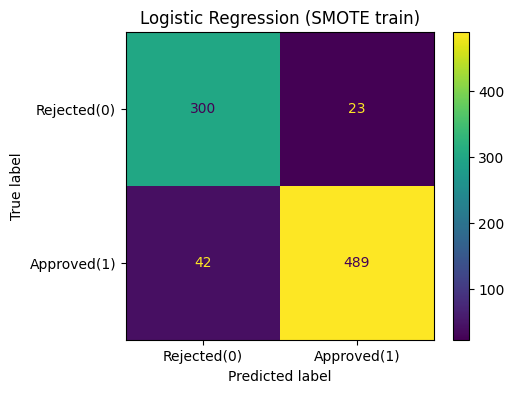


=== Decision Tree (SMOTE train) ===
Precision: 0.9794392523364486
Recall:    0.9868173258003766
F1-score:  0.9831144465290806

Classification report:
               precision    recall  f1-score   support

           0     0.9781    0.9659    0.9720       323
           1     0.9794    0.9868    0.9831       531

    accuracy                         0.9789       854
   macro avg     0.9787    0.9764    0.9775       854
weighted avg     0.9789    0.9789    0.9789       854



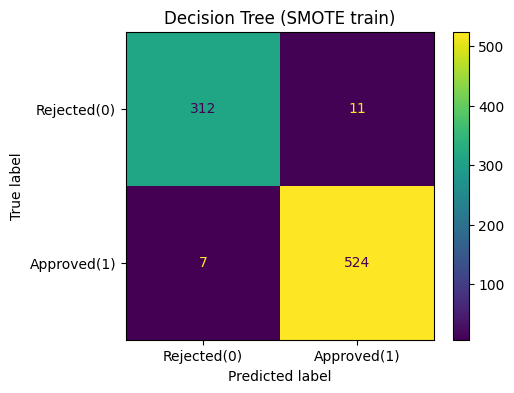

In [14]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def eval_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:   ", recall_score(y_test, y_pred, zero_division=0))
    print("F1-score: ", f1_score(y_test, y_pred, zero_division=0))
    print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected(0)','Approved(1)'])
    fig, ax = plt.subplots(figsize=(5,4))
    disp.plot(ax=ax)
    ax.set_title(name)
    plt.show()
    return y_pred

y_pred_log = eval_model(log, X_test_prep, y_test, "Logistic Regression (SMOTE train)")
y_pred_tree = eval_model(tree, X_test_prep, y_test, "Decision Tree (SMOTE train)")


**Step 10: Feature names, importances & coefficients**

In [15]:
# recover feature names from ColumnTransformer
num_features = num_cols
cat_features = []
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
if hasattr(ohe, "get_feature_names_out"):
    cat_features = list(ohe.get_feature_names_out(cat_cols))
else:
    cat_features = []
feature_names = list(num_features) + cat_features
print("Number of features after preprocessing:", len(feature_names))

# Decision tree importances
import numpy as np
if len(feature_names) == len(tree.feature_importances_):
    fi = pd.Series(tree.feature_importances_, index=feature_names).sort_values(ascending=False)
    display(fi.head(15))
else:
    print("Feature name length mismatch; showing top indices")
    idx = np.argsort(tree.feature_importances_)[::-1][:15]
    display(pd.Series(tree.feature_importances_[idx], index=[f"feature_{i}" for i in idx]))

# Logistic coefficients
try:
    coef = log.coef_[0]
    idx = np.argsort(np.abs(coef))[::-1][:15]
    if len(feature_names) == len(coef):
        display(pd.Series(coef[idx], index=np.array(feature_names)[idx]))
    else:
        display(pd.Series(coef[idx], index=[f"feature_{i}" for i in idx]))
except Exception as e:
    print("Could not extract logistic coefficients:", e)


Number of features after preprocessing: 18


,0
cibil_score,0.847701
loan_term,0.056327
loan_amount,0.035020
income_annum,0.023979
commercial_assets_value,0.013099
bank_asset_value,0.005899
luxury_assets_value,0.004217
residential_assets_value,0.003991
no_of_dependents_2,0.002607
no_of_dependents_5,0.002374


,0
cibil_score,4.344463
income_annum,-1.605740
loan_amount,1.365303
loan_term,-0.814369
education_ Graduate,0.368795
self_employed_ Yes,0.330666
self_employed_ No,0.314131
no_of_dependents_0,0.292530
education_ Not Graduate,0.276001
no_of_dependents_3,0.189499


**Step 11: Let us Compare with class_weight='balanced'**


=== LogReg class_weight='balanced' ===
Precision: 0.9607072691552063
Recall:    0.9209039548022598
F1-score:  0.9403846153846154

Classification report:
               precision    recall  f1-score   support

           0     0.8783    0.9381    0.9072       323
           1     0.9607    0.9209    0.9404       531

    accuracy                         0.9274       854
   macro avg     0.9195    0.9295    0.9238       854
weighted avg     0.9295    0.9274    0.9278       854



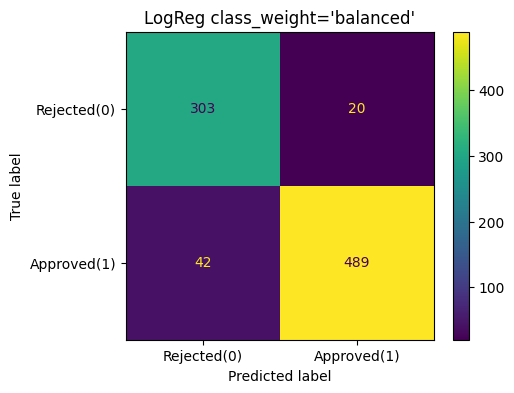


=== Tree class_weight='balanced' ===
Precision: 0.9758364312267658
Recall:    0.9887005649717514
F1-score:  0.9822263797942001

Classification report:
               precision    recall  f1-score   support

           0     0.9810    0.9598    0.9703       323
           1     0.9758    0.9887    0.9822       531

    accuracy                         0.9778       854
   macro avg     0.9784    0.9742    0.9762       854
weighted avg     0.9778    0.9778    0.9777       854



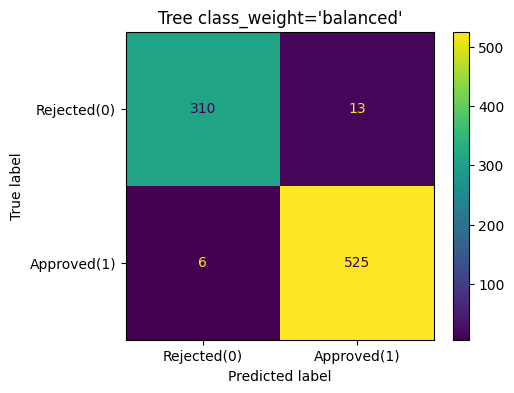

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [16]:
log_bal = LogisticRegression(max_iter=2000, solver='liblinear', class_weight='balanced', random_state=42)
tree_bal = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# train on original (non-SMOTE) preprocessed train set for class_weight approach
log_bal.fit(X_train_prep, y_train)
tree_bal.fit(X_train_prep, y_train)

eval_model(log_bal, X_test_prep, y_test, "LogReg class_weight='balanced'")
eval_model(tree_bal, X_test_prep, y_test, "Tree class_weight='balanced'")


Step 12: Save models & preprocessor

In [17]:
import joblib
joblib.dump(log, 'logistic_smote.pkl')
joblib.dump(tree, 'tree_smote.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

from google.colab import files
files.download('logistic_smote.pkl')
files.download('tree_smote.pkl')
files.download('preprocessor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**WHEN YOU RUN THIS PROJECT YOU HAVE TO RUN ALL STEP BY STEP WITHOUT JUMPING ONE STEP**